<a href="https://colab.research.google.com/github/alik604/Notebooks/blob/master/Data%20Science-Datasets/MNIST/Where_to_add_GaussianNoise_MNIST_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import print_function
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import *

from tensorflow.keras import backend as K
import tensorflow as tf

import pandas as pd
import numpy as np

In [2]:
batch_size = 64
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
print(x_train.shape)
print(x_test.shape)
x = np.concatenate([x_train,x_test])
y = np.concatenate([y_train,y_test])

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.98, random_state=42)

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(1400, 28, 28, 1)
(68600, 28, 28, 1)


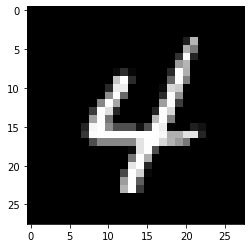

In [4]:
import matplotlib.pyplot as plt
tmp = x_train[0].reshape((28, 28))
plt.imshow(tmp, cmap='gray')

 [layers order](http://cs231n.github.io/convolutional-networks/#layerpat)



 100; 4, yeilds 98%. 
 
 
 50; 3, yeilds 98%. 
 
 
 100; 3, with final layer(Dense(num_classes, activation='relu')), yeilds 34.65%
 
100; 3, with final layer: Dense(num_classes, activation='sigmoid') , yeilds 9.8%

In [5]:
# Adam
model = Sequential()
model.add(Conv2D(filters=100, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=100, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))
 
opt = tf.keras.optimizers.Adam()

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=30,
          verbose=1,
          validation_data=(x_test, y_test))


score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]) # Test accuracy: 0.9916999936103821

Epoch 1/30
22/22 [==============================] - 4s 163ms/step - loss: 0.9612 - accuracy: 0.6986 - val_loss: 1.9340 - val_accuracy: 0.7279
Epoch 2/30
22/22 [==============================] - 3s 153ms/step - loss: 0.2024 - accuracy: 0.9336 - val_loss: 1.7771 - val_accuracy: 0.8533
Epoch 3/30
22/22 [==============================] - 3s 155ms/step - loss: 0.1094 - accuracy: 0.9679 - val_loss: 1.6932 - val_accuracy: 0.8315
Epoch 4/30
22/22 [==============================] - 3s 154ms/step - loss: 0.0530 - accuracy: 0.9900 - val_loss: 1.5853 - val_accuracy: 0.8731
Epoch 5/30
22/22 [==============================] - 3s 152ms/step - loss: 0.0318 - accuracy: 0.9921 - val_loss: 1.4529 - val_accuracy: 0.9168
Epoch 6/30
22/22 [==============================] - 3s 149ms/step - loss: 0.0173 - accuracy: 0.9993 - val_loss: 1.3307 - val_accuracy: 0.9367
Epoch 7/30
22/22 [==============================] - 3s 148ms/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 1.1893 - val_accuracy: 0.9370
Epoch 

In [6]:
# Adam
model = Sequential()
model.add(Conv2D(filters=100, kernel_size=3)) # remove relu
# model.add(GaussianNoise(0.5)) # sandwich between
# GaussianNoise(0.5) here - accuracy: 0.9829 - val_loss: 0.4050 - val_accuracy: 0.9024
model.add(Activation('relu')) # add relu 
# GaussianNoise(0.5) here - accuracy: 0.9900 - val_loss: 1.4703 - val_accuracy: 0.8073
model.add(MaxPooling2D(pool_size=(2, 2)))
# GaussianNoise(0.5) here - accuracy: 0.9721 - val_loss: 0.3031 - val_accuracy: 0.9356
model.add(BatchNormalization())
# GaussianNoise(0.5) here - accuracy: 1.0000 - val_loss: 0.1905 - val_accuracy: 0.9538 

model.add(Conv2D(filters=100, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))
 
opt = tf.keras.optimizers.Adam()

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=30,
          verbose=1,
          validation_data=(x_test, y_test))


score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]) # Test accuracy: 0.9916999936103821

Epoch 1/30
22/22 [==============================] - 3s 156ms/step - loss: 0.8544 - accuracy: 0.7186 - val_loss: 1.9185 - val_accuracy: 0.7208
Epoch 2/30
22/22 [==============================] - 3s 149ms/step - loss: 0.1900 - accuracy: 0.9379 - val_loss: 1.7817 - val_accuracy: 0.8643
Epoch 3/30
22/22 [==============================] - 3s 148ms/step - loss: 0.0830 - accuracy: 0.9743 - val_loss: 1.6730 - val_accuracy: 0.9039
Epoch 4/30
22/22 [==============================] - 3s 146ms/step - loss: 0.0386 - accuracy: 0.9936 - val_loss: 1.5484 - val_accuracy: 0.9235
Epoch 5/30
22/22 [==============================] - 3s 146ms/step - loss: 0.0144 - accuracy: 1.0000 - val_loss: 1.4193 - val_accuracy: 0.9342
Epoch 6/30
22/22 [==============================] - 3s 146ms/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 1.2866 - val_accuracy: 0.9431
Epoch 7/30
22/22 [==============================] - 3s 145ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 1.1532 - val_accuracy: 0.9478
Epoch 

In [7]:
# Adadelta default
model = Sequential()
model.add(Conv2D(filters=100, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=100, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

opt = tf.keras.optimizers.Adadelta()

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=30,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]) # Test accuracy: 0.9916999936103821

Epoch 1/30
22/22 [==============================] - 3s 157ms/step - loss: 2.8185 - accuracy: 0.0486 - val_loss: 2.3156 - val_accuracy: 0.0418
Epoch 2/30
22/22 [==============================] - 3s 149ms/step - loss: 2.7763 - accuracy: 0.0529 - val_loss: 2.3158 - val_accuracy: 0.0441
Epoch 3/30
22/22 [==============================] - 3s 147ms/step - loss: 2.7342 - accuracy: 0.0579 - val_loss: 2.3158 - val_accuracy: 0.0472
Epoch 4/30
22/22 [==============================] - 3s 146ms/step - loss: 2.6971 - accuracy: 0.0579 - val_loss: 2.3157 - val_accuracy: 0.0506
Epoch 5/30
22/22 [==============================] - 3s 148ms/step - loss: 2.6580 - accuracy: 0.0636 - val_loss: 2.3154 - val_accuracy: 0.0548
Epoch 6/30
22/22 [==============================] - 3s 147ms/step - loss: 2.6233 - accuracy: 0.0671 - val_loss: 2.3149 - val_accuracy: 0.0592
Epoch 7/30
22/22 [==============================] - 3s 147ms/step - loss: 2.5889 - accuracy: 0.0793 - val_loss: 2.3142 - val_accuracy: 0.0644
Epoch 

In [8]:
# Adadelta 10x
model = Sequential()
model.add(Conv2D(filters=100, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=100, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

opt = tf.keras.optimizers.Adadelta(0.01)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=30,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]) # Test accuracy: 0.9916999936103821

Epoch 1/30
22/22 [==============================] - 3s 154ms/step - loss: 2.4041 - accuracy: 0.1400 - val_loss: 2.2928 - val_accuracy: 0.2092
Epoch 2/30
22/22 [==============================] - 3s 149ms/step - loss: 2.1710 - accuracy: 0.2471 - val_loss: 2.2793 - val_accuracy: 0.2503
Epoch 3/30
22/22 [==============================] - 3s 146ms/step - loss: 1.9841 - accuracy: 0.3671 - val_loss: 2.2633 - val_accuracy: 0.3123
Epoch 4/30
22/22 [==============================] - 3s 145ms/step - loss: 1.8178 - accuracy: 0.4650 - val_loss: 2.2441 - val_accuracy: 0.3889
Epoch 5/30
22/22 [==============================] - 3s 145ms/step - loss: 1.6689 - accuracy: 0.5429 - val_loss: 2.2218 - val_accuracy: 0.4700
Epoch 6/30
22/22 [==============================] - 3s 145ms/step - loss: 1.5364 - accuracy: 0.6093 - val_loss: 2.1957 - val_accuracy: 0.5438
Epoch 7/30
22/22 [==============================] - 3s 147ms/step - loss: 1.4148 - accuracy: 0.6729 - val_loss: 2.1655 - val_accuracy: 0.6050
Epoch 